In [1]:
!which python

/home/fabian/.venv/bin/python


In [2]:
# import gymnasium as gym
# import tensorflow as tf
import f110_gym

In [3]:
# reimport f110_gym
import importlib
import f110_gym.envs.datatset_env


2023-08-07 09:10:20.578795: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-07 09:10:20.633566: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-07 09:10:20.996537: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-07 09:10:21.001628: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-07 09:10:22.453921: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [4]:
import matplotlib.pyplot as plt

In [72]:
importlib.reload(f110_gym.envs.datatset_env)
from f110_gym.envs.datatset_env import F1tenthDatasetEnv
# from f110_gym.envs.base_classes import Integrator

In [73]:
F110Env = F1tenthDatasetEnv("test",dict(), 
                            as_trajectories=True,
                            flatten_obs=True,
                            laser_obs=False,
                            flatten_trajectories=False,
                            subsample_laser=10,
                            )
trajectories = F110Env.get_dataset(zarr_path="/home/fabian/f1tenth_gym/collect_dataset/trajectories.zarr",)


/home/fabian/f1tenth_gym/collect_dataset/trajectories.zarr
<generator object Group.group_keys at 0x7f5431e066d0>
19


In [74]:
for i in trajectories:
    print(i["infos"]["agent"][0])
    print(i["infos"]["target_speed"][0])
    print(i["infos"]['index'])

StochasticFTGAgent
2.0
0
StochasticFTGAgent
2.0
1
StochasticFTGAgent
2.0
2
StochasticFTGAgent
2.0
3
StochasticFTGAgent
2.0
4
StochasticFTGAgent
4.0
5
StochasticFTGAgent
4.0
6
StochasticFTGAgent
4.0
7
StochasticFTGAgent
4.0
8
StochasticFTGAgent
4.0
9
StochasticFTGAgent
4.0
10
StochasticFTGAgent
4.0
11
StochasticFTGAgent
4.0
12
StochasticFTGAgent
4.0
13
StochasticFTGAgent
4.0
14
StochasticFTGAgent
4.0
15
StochasticFTGAgent
4.0
16
StochasticFTGAgent
4.0
17
StochasticFTGAgent
4.0
18
StochasticFTGAgent
4.0
19


In [75]:
print(trajectories[0]["obs_keys"])

['ang_vels_z', 'linear_vel_x', 'linear_vel_y', 'pose_theta', 'pose_x', 'pose_y']


In [76]:

len(trajectories[0]["scan"])

KeyError: 'scan'

In [77]:
print(trajectories[0]["observations"].shape)

(6, 213)


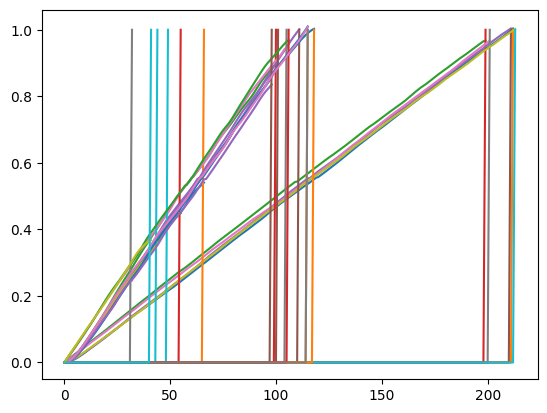

In [78]:
# plot the progress
for trajectory in trajectories:
    plt.plot(trajectory['progress'])
    plt.plot(trajectory['terminals'])
    # print the last 10 progress and terminals
    #break
plt.show()

dict_keys(['rewards', 'terminals', 'progress', 'infos', 'obs_keys', 'observations'])


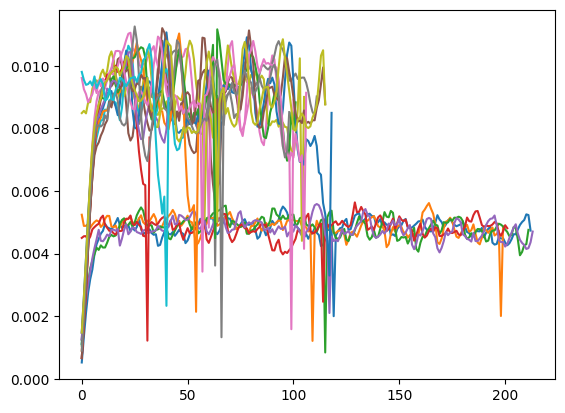

20


In [79]:
print(trajectories[0].keys())
# print(trajectories[0]['rewards'])
# plot all rewards
for trajectory in trajectories:
    plt.plot(trajectory['rewards'])
    #plt.plot(trajectory['terminals']*0.05)
plt.show()
print(len(trajectories))


In [80]:
print(trajectories[0]["infos"])

{'agent': array(['StochasticFTGAgent', 'StochasticFTGAgent', 'StochasticFTGAgent',
       'StochasticFTGAgent', 'StochasticFTGAgent', 'StochasticFTGAgent',
       'StochasticFTGAgent', 'StochasticFTGAgent', 'StochasticFTGAgent',
       'StochasticFTGAgent', 'StochasticFTGAgent', 'StochasticFTGAgent',
       'StochasticFTGAgent', 'StochasticFTGAgent', 'StochasticFTGAgent',
       'StochasticFTGAgent', 'StochasticFTGAgent', 'StochasticFTGAgent',
       'StochasticFTGAgent', 'StochasticFTGAgent', 'StochasticFTGAgent',
       'StochasticFTGAgent', 'StochasticFTGAgent', 'StochasticFTGAgent',
       'StochasticFTGAgent', 'StochasticFTGAgent', 'StochasticFTGAgent',
       'StochasticFTGAgent', 'StochasticFTGAgent', 'StochasticFTGAgent',
       'StochasticFTGAgent', 'StochasticFTGAgent', 'StochasticFTGAgent',
       'StochasticFTGAgent', 'StochasticFTGAgent', 'StochasticFTGAgent',
       'StochasticFTGAgent', 'StochasticFTGAgent', 'StochasticFTGAgent',
       'StochasticFTGAgent', 'StochasticF

In [43]:
trajectories[0]['observations'].shape

(6, 213)

In [44]:
F110Env.flatten_obs

True

In [45]:
len(F110Env.dataset['infos'])

0

In [48]:
len(F110Env.dataset['terminals'])

2070

In [49]:
len(F110Env.dataset['rewards'])

2070

In [50]:
len(F110Env.dataset['observations'])

2070

In [51]:
len(F110Env.dataset['actions'])

2070

In [52]:
# print the type of the actions
type(F110Env.dataset['actions'][0][1])


tensorflow.python.framework.ops.EagerTensor

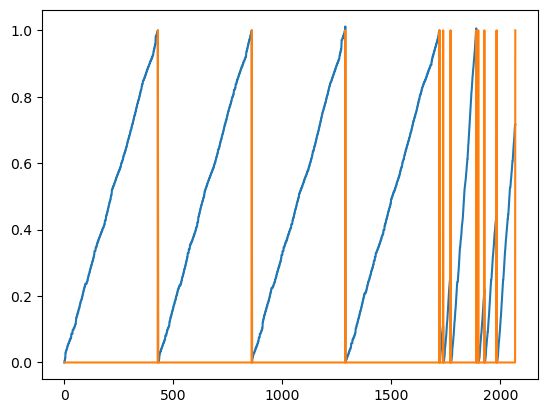

In [53]:
# plot rewards and done
import matplotlib.pyplot as plt
plt.plot(F110Env.dataset["rewards"])
plt.plot(F110Env.dataset["terminals"])
plt.show()

In [54]:
import numpy as np

In [55]:
trajectories = np.split(F110Env.dataset['rewards'], np.where(F110Env.dataset['terminals'])[0]+1)[0:-1]

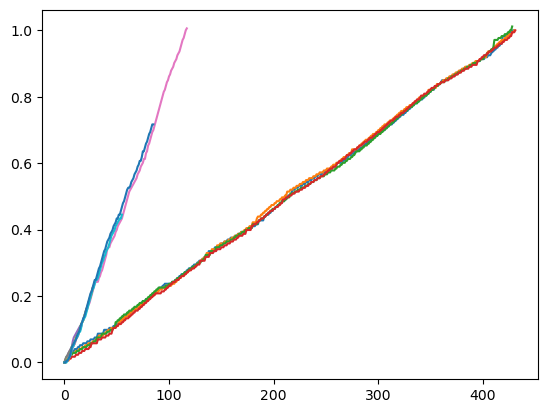

In [56]:
for tra in trajectories:
    plt.plot(tra)
plt.show()

The reward looks boring because the map is boring and the speed is (close to) constant

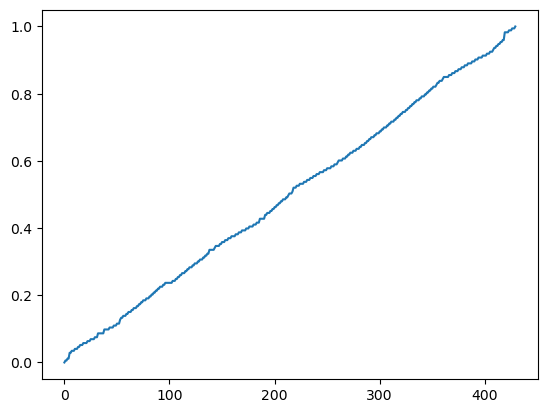

reward 21.890263787372696
430


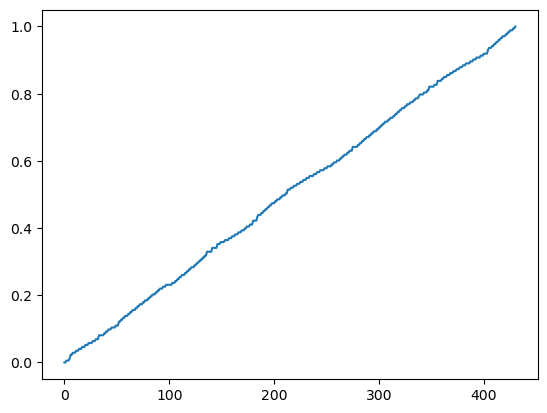

reward 21.604499153296178
431


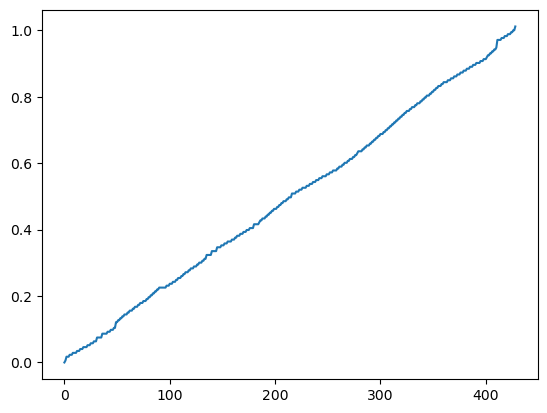

reward 21.566338672856265
429


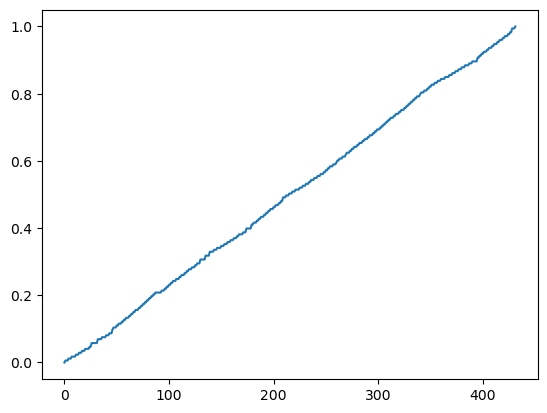

reward 20.918273791234483
432


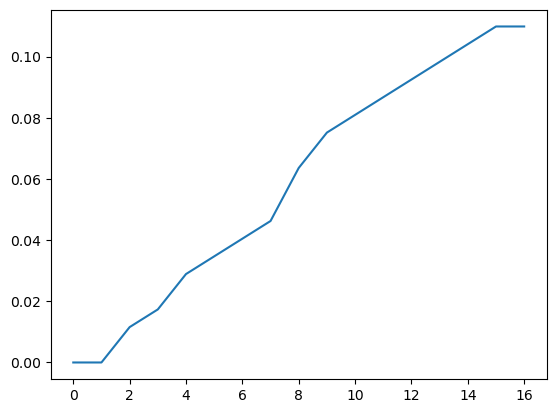

reward 0.8948004985880363
17


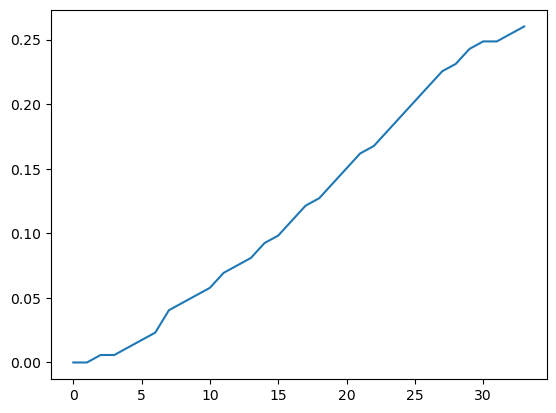

reward 3.289173740561641
34


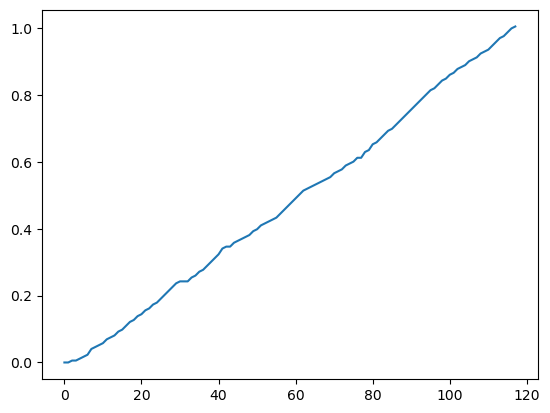

reward 26.51270870314543
118


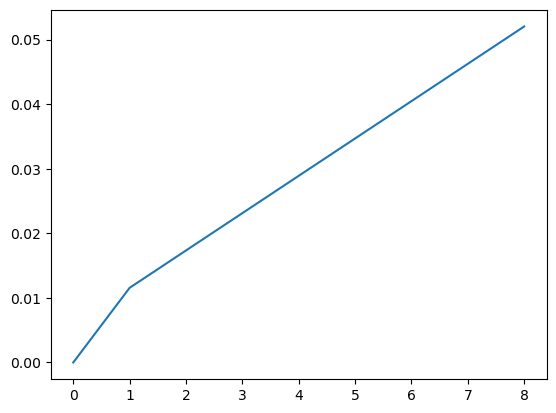

reward 0.24082082328505325
9


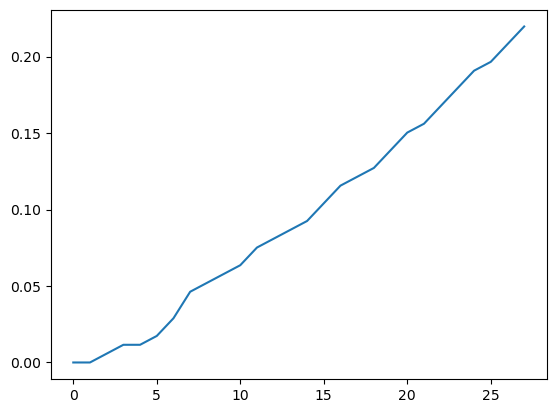

reward 2.2358335356552264
28


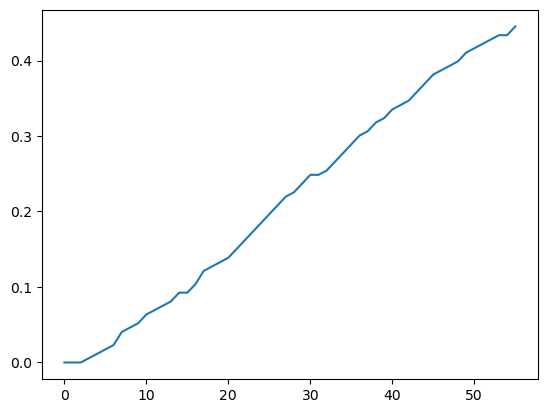

reward 8.37765032751011
56


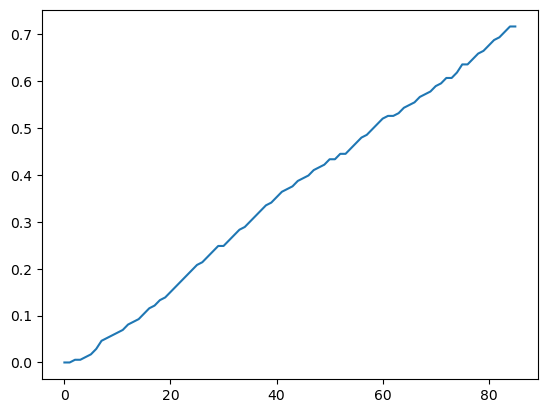

reward 17.541514439875893
86


In [59]:
# calculate reward for each tra
gamma = 0.99  # discount factor

for rewards in trajectories:
    discounted_rewards = np.zeros_like(rewards, dtype=np.float32)
    cumulative_rewards = 0

    for i in reversed(range(len(rewards))):
        cumulative_rewards = rewards[i] + gamma * cumulative_rewards
        discounted_rewards[i] = cumulative_rewards
    plt.plot(rewards)
    plt.show()
    print(f"reward {cumulative_rewards}")
    print(len(rewards))